In [40]:
# Pytorch neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [41]:
features = pd.read_csv('temps.csv')

features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


### In the data table
* year,both,day,week: the specific time of the day.
* temp_2: the highest temperature of the day before yesterday.
* temp_1: yesterday's maximum temperature value
* average: the average maximum temperature value of this day in each year in the history.
* actual: this is our labeled value, the real maximum temperature of the day
* friend: this column may be hilarious, your friend guessed the possible value, we do not care it is fine

In [42]:
print('Data dimensions: ', features.shape)

Data dimensions:  (348, 9)


In [43]:
# Processing time data
import datetime

# Get year, month, day, respectively
years = features['year']
months = features['month']
days = features['day']

# datetime format
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [44]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

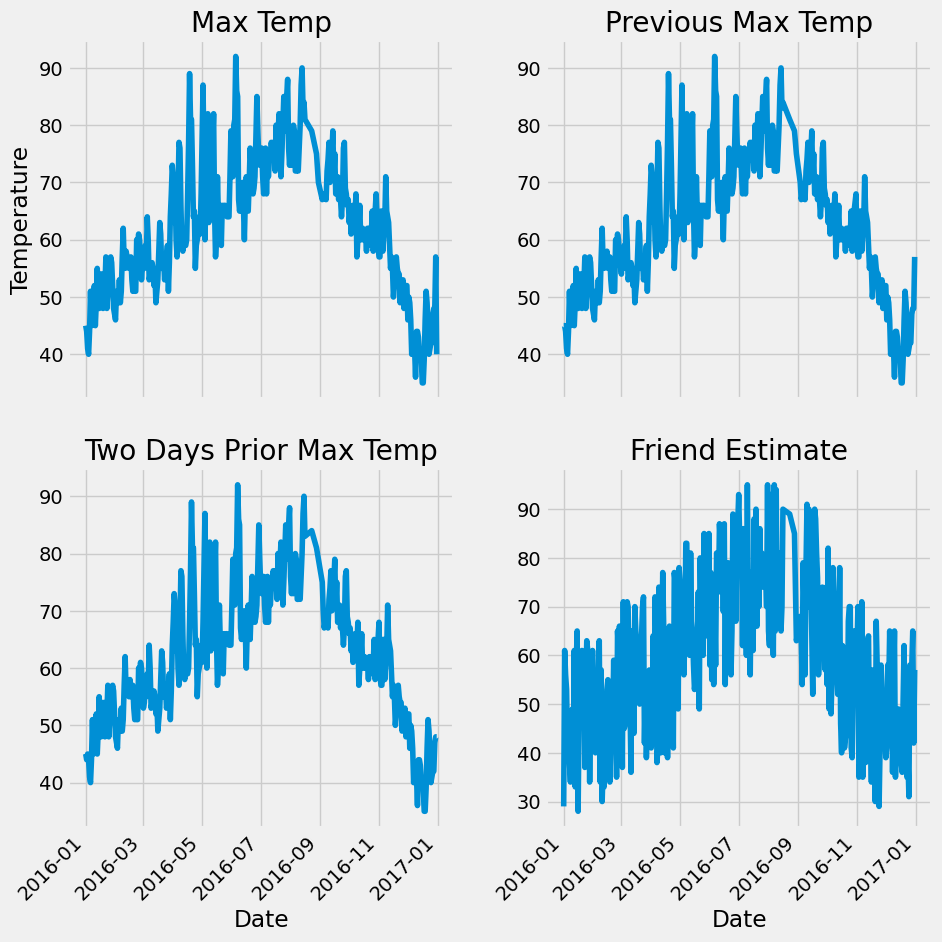

In [45]:
# Prepare to draw.
# Specify default style
plt.style.use('fivethirtyeight')

# Setting the Layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.autofmt_xdate(rotation = 45)

# Tagged value
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Yesterday
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax1.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# The day before yesterday
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax1.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax1.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [46]:
# One-hot code
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [47]:
# Label
labels = np.array(features['actual'])

# Removing labels from features
features = features.drop('actual', axis = 1)

# Names are kept separate
features_list = list(features.columns)

# Convert to appropriate format
features = np.array(features)

In [48]:
features.shape

(348, 14)

In [49]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [50]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

# Modeling the network

In [51]:
x = torch.tensor(input_features, dtype = float)

y = torch.tensor(labels, dtype = float)

# Weight parameter initialization
weights = torch.randn((14, 128), dtype = float, requires_grad = True)
biases = torch.randn(128, dtype = float, requires_grad = True)
weights2 = torch.randn((128, 1), dtype = float, requires_grad = True)
biases2 = torch.randn(1, dtype = float, requires_grad = True)

learning_rate = 0.001
losses = []

for i in range(1000):
    # Computational hermitian
    hidden = x.mm(weights) + biases
    # Add activation function
    hidden = torch.relu(hidden)
    # Projected results
    predictions = hidden.mm(weights2) + biases2
    # Calculation of losses
    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())

    # Print Loss Value
    if i % 100 == 0:
        print('loss:', loss)
    # Backpropagation calculation
    loss.backward()

    # Updating parameters
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    biases2.data.add_(- learning_rate * biases2.grad.data)

    # Remember to clear it with each iteration
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
    biases2.grad.data.zero_()

loss: tensor(6504.1504, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(156.1160, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(147.3469, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(144.5438, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(143.1128, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(142.2595, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(141.6825, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(141.2662, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(140.9488, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(140.6973, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [52]:
predictions.shape

torch.Size([348, 1])

# Easier to build network models

In [53]:
input_size = input_features.shape[1]
hidden_size = 128
output_size = 1
batch_size = 16
my_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(), ## nn.ReLU()
    torch.nn.Linear(hidden_size, output_size)
)
cost = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(my_nn.parameters(), lr = 0.001)

In [54]:
# Training network
losses = []
for i in range(1000):
    batch_loss = []
    # MINI-Batch method for training.
    for start in range(0, len(input_features), batch_size):
        end = start + batch_size if start + batch_size < len(input_features) else len(input_features)
        xx = torch.tensor(input_features[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(labels[start:end], dtype = torch.float, requires_grad = True)
        prediction = my_nn(xx)
        loss = cost(prediction, yy)
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        batch_loss.append(loss.data.numpy())

    # Print Loss
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 4011.7383
100 37.881687
200 35.66984
300 35.31377
400 35.144577
500 35.00717
600 34.88465
700 34.76435
800 34.64085
900 34.512287


# Predicting training results

In [55]:
x = torch.tensor(input_features, dtype = torch.float)
predict = my_nn(x).data.numpy()

In [60]:
# Convert Date Format
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Create a table to store dates and their corresponding label values
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Similarly, create another one to store the date and its corresponding model predictions
months = features[:, features_list.index('month')]
days = features[:, features_list.index('day')]
years = features[:, features_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)})
predictions_data

,date,prediction
0,2016-01-01,47.475590
1,2016-01-02,47.549870
2,2016-01-03,47.206688
3,2016-01-04,46.790157
4,2016-01-05,47.453690
...,...,...
343,2016-12-27,44.854237
344,2016-12-28,44.744167
345,2016-12-29,46.307552
346,2016-12-30,46.660496
